In [8]:
# Last amended: 13th May 2022
# Data source: Kaggle: https://www.kaggle.com/fayomi/advertising
#
# Spyder note: Use F9 in Spyder to execute a line and advance
#
# objectives:
#           Discover relationships and existence of pattern
#           in data
#              i)  Feature Engineering for categorical variables
#             ii)  Extracting datetime components
#             iii) Behaviour of 'apply' vs 'map' for Series
#              iv)  Learning to draw various types of graphs
#               v)  Conditional plots using catplot
#              vi)  Relationship plots using relplot
#             vii)  Learning seaborn plots
#            viii)  Looking at structure in data
#                       a. Parallel coordinates plots
#                       b. Radviz plots
#                       c. Andrews curves

# Good reference: https://seaborn.pydata.org/introduction.html


In [8]:
# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os

# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline

In [9]:
# 1.6.1 For generating random numbers:
rng = default_rng()

In [10]:
abc=pd.read_csv("C:\\Users\\arpit\\OneDrive\\Desktop\\Term2\\train.csv")

In [11]:
ad=abc.sample(n=1000)#comment

In [12]:
# 2.1 Have a look at the data
ad.head()
print("\n-----\n")
ad.dtypes
print("\n------\n")
ad.dtypes.value_counts()


-----


------



object     116
float64     15
int64        1
dtype: int64

In [13]:
# 3.0 Select only numeric columns for the purpose
num_data = ad.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
num_data.shape       
num_data.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'loss'],
      dtype='object')

In [14]:
pip install matplotlib

In [5]:
import matplotlib.pyplot as plt

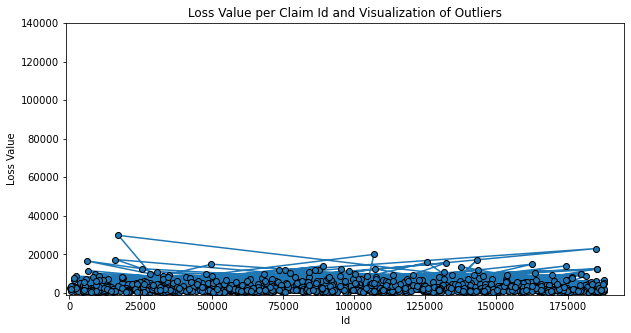

In [15]:
# View outliers for loss amount
plt.figure(figsize=(10,5))
plt.xlabel('Id')
plt.ylabel('Loss Value')
plt.title('Loss Value per Claim Id and Visualization of Outliers')
plt.xlim([-1000, 195000])
plt.ylim([-1000, 140000])
plt.plot(ad.index, ad["loss"], marker='o', markeredgecolor='k')
plt.show()

We can spot the furthest outlier with loss value around 37,500 USD

In [16]:
ad.describe

<bound method NDFrame.describe of             id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6  \
58916   184646    B    B    A    B    A    A    A    A    B  ...  0.631275   
107049  334365    B    B    A    A    A    A    A    A    B  ...  0.336630   
2388      7591    A    B    A    B    A    A    A    A    B  ...  0.330356   
7588     24177    A    A    A    B    A    B    A    A    A  ...  0.198493   
128796  401808    B    B    A    A    A    A    A    A    B  ...  0.237504   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
84041   263047    B    A    A    A    B    A    A    A    A  ...  0.415039   
46786   146826    A    A    A    A    B    A    A    A    A  ...  0.528840   
122134  381399    A    A    A    B    B    A    A    B    A  ...  0.396327   
56058   175699    A    A    A    B    A    A    A    A    A  ...  0.817531   
23706    74441    A    B    A    A    A    A    A    A    B  ...  0.271144   

           cont7    cont8    

Analyze the distribution of the continuous features

In [18]:
contFeatureslist = []
for colName,x in ad.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

In [19]:
print(contFeatureslist)

['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [20]:
contFeatureslist.remove("id")
contFeatureslist.remove("loss")

{'whiskers': [<matplotlib.lines.Line2D at 0x1acc0a3f430>,
 'caps': [<matplotlib.lines.Line2D at 0x1acc0a3faf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1acc0a3f0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1acc0a471f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1acc0a47550>,
 'means': []}

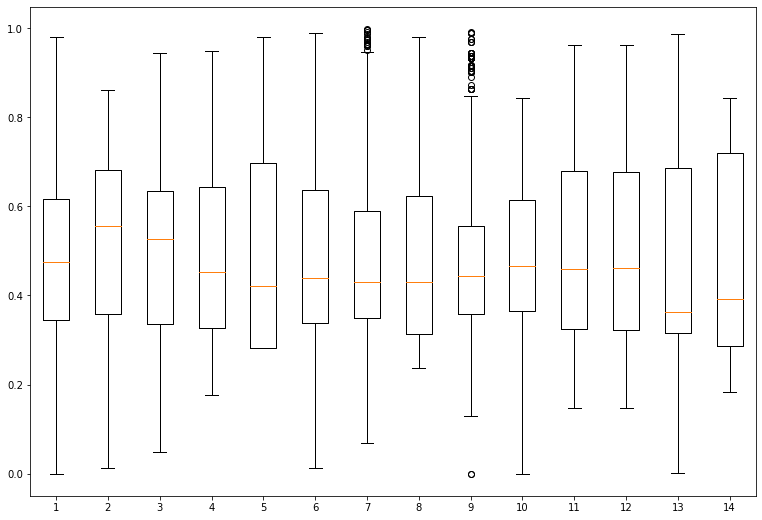

In [22]:
#Box Plots for the continuous features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(13,9))
plt.boxplot(ad[contFeatureslist])

In [23]:
contFeatureslist.append("loss")

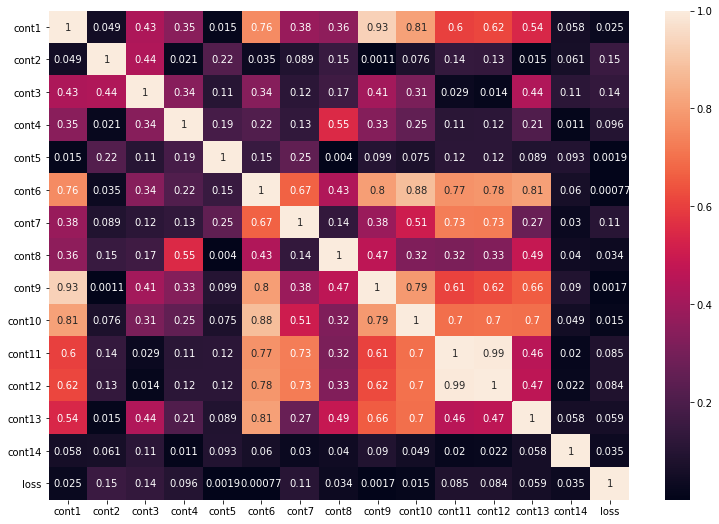

In [25]:
contvar=[col for col in ad.columns if 'cont' in col]
correlationMatrix =ad[contvar+['loss']].corr().abs()
plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loss', ylabel='Density'>

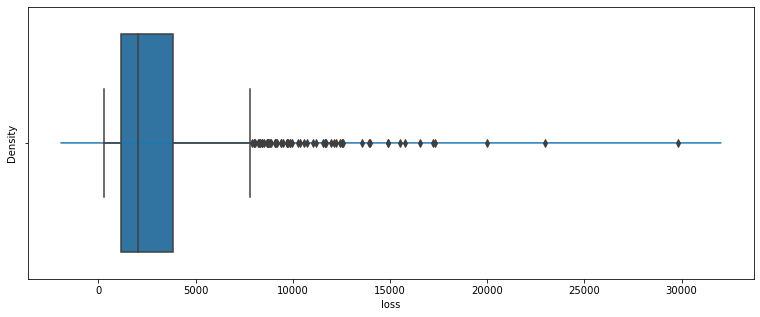

In [26]:
#Analysis of Loss Feature
plt.figure(figsize=(13,5))
sns.distplot(ad["loss"])
sns.boxplot(ad["loss"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


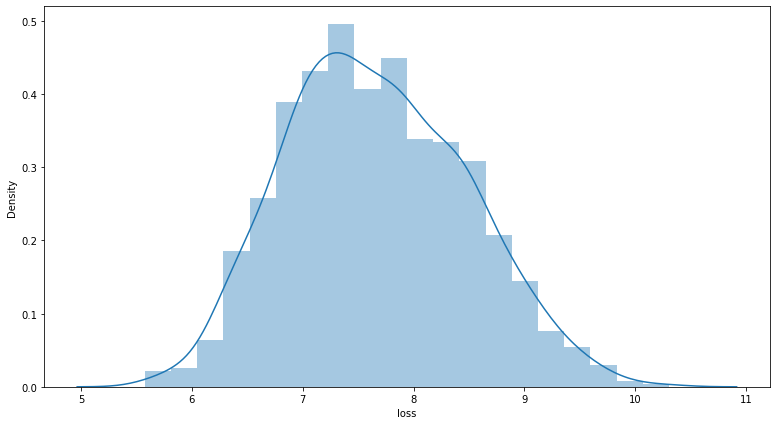

In [27]:
plt.figure(figsize=(13,7))
sns.distplot(np.log1p(ad["loss"]))
plt.show()